In [1]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [13]:
DATA = "../data/books/compare-compression-frames/"

In [4]:
def captureAndSave():
    ''' return: img1, img2 as np.ndarry; write img1 and img2 to file '''
    
    cam = cv2.VideoCapture(0)
    
    _savefn = DATA + "vidout.avi"
    _outshape = (640,480)
    _outfps = 30
    _fourcc = cv2.VideoWriter_fourcc("X","2","6","4")
    
    out = cv2.VideoWriter(_savefn,_fourcc,_outfps,_outshape)
    
    #dummy read
    ret,frame = cam.read()
    
    ret,frame = cam.read()
    img1 = frame.copy()
    out.write(frame)
    
    ret,frame = cam.read()
    img2 = frame.copy()
    out.write(frame)
    
    out.release()
    cam.release()
    
    return img1, img2
    

In [5]:
def loadFramesFromVid():
    ''' load the compressed video and extract'''
    
    cam = cv2.VideoCapture(DATA + "vidout.avi")
    
    ret,frame = cam.read()

    img1 = frame.copy()
    
    ret, frame = cam.read()
    img2 = frame.copy()
    
    cam.release()
    
    return img1, img2

In [6]:
def diffSummary(img_a, img_b, b_gray=True):
    ''' returns number of different pixels img_a vs img_b
                in grayscale if b_gray=True
    '''
    if b_gray:
        _a = cv2.cvtColor(img_a, cv2.COLOR_BGR2GRAY)
        _b = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)    
        frame_diff = cv2.absdiff(_a, _b)
        return sum(sum(frame_diff))
    else:
        frame_diff = cv2.absdiff(img_a, img_b)
        return sum(sum(sum(frame_diff)))

In [7]:
print diffSummary( cv2.imread(DATA+"output.jpg")
                  ,cv2.imread(DATA+"output.png")
                  ,b_gray=True
                 )
print diffSummary( cv2.imread(DATA+"output.jpg")
                  ,cv2.imread(DATA+"output.png")
                  ,b_gray=False
                 )
print diffSummary( cv2.imread(DATA+"output.png")
                  ,cv2.imread(DATA+"output.png")
                  ,b_gray=False
                 )

178
563
0


In [8]:
def saveAsPngAndJpg(img):
    cv2.imwrite(DATA + "save.png", img)
    cv2.imwrite(DATA + "save.jpg", img)
    
def loadSavedImgs():
    img_png = cv2.imread(DATA + "save.png")
    img_jpg = cv2.imread(DATA + "save.jpg")
    return img_png, img_jpg

###### Test for compression conditions / display sizes

In [9]:
origImg1, origImg2 = captureAndSave()

assert type(origImg1).__name__ == 'ndarray'
assert type(origImg2).__name__ == 'ndarray'

assert origImg1.shape == (480,640,3)
assert origImg2.shape == (480,640,3)

assert diffSummary(origImg1, origImg2) > 0

vidCompImg1, vidCompImg2 = loadFramesFromVid()

saveAsPngAndJpg(origImg1)
pngCompImg1, jpgCompImg1 = loadSavedImgs()

#Png is lossless, but jpg distorts
assert diffSummary(origImg1, pngCompImg1)   == 0
assert diffSummary(origImg1, jpgCompImg1)    > 0
assert diffSummary(pngCompImg1, jpgCompImg1) > 0

#h264 is different, different then jpg too
assert diffSummary(origImg1, vidCompImg1) > 0
assert diffSummary(origImg2, vidCompImg2) > 0

assert diffSummary(pngCompImg1, vidCompImg1) > 0
assert diffSummary(jpgCompImg1, vidCompImg1) > 0

# look at size on disk
print 'jpg file size:   %i' % os.path.getsize(DATA + "save.jpg")
print 'png file size:   %i' % os.path.getsize(DATA + "save.png")
print 'avi size (2x):   %i' % os.path.getsize(DATA + "vidout.avi")

#look at size in memory
print ''
print 'image shape:      %s' % str(origImg1.shape)
print 'product of dims:  %i '% reduce( lambda x,y: x*y ,origImg1.shape)
print 'memory size:      %i' % sys.getsizeof(origImg1)

#Look at ratios
print ''

pct_comp = float(os.path.getsize(DATA + "save.png")) / float(sys.getsizeof(origImg1))
print 'loseless compression pct: %.2f' % pct_comp

pct_comp = float(os.path.getsize(DATA + "save.jpg")) / float(sys.getsizeof(origImg1))
print 'jpg compression pct:      %.2f' % pct_comp

#Look at diffs
print ''
x = origImg1.shape[0] * origImg1.shape[1]
def div(x,y):
    return float(x) / float(y)
print 'b/w two adjacent frames: %.2f'% div(diffSummary(origImg1, origImg2), x)
print 'b/w png/jpg:             %.2f' % div(diffSummary(pngCompImg1, jpgCompImg1), x)
print 'b/w png/h264:            %.2f' % div(diffSummary(pngCompImg1, vidCompImg1), x)
print 'b/w jpg/h264:            %.2f' % div(diffSummary(jpgCompImg1, vidCompImg1), x)


jpg file size:   31875
png file size:   209295
avi size (2x):   9844

image shape:      (480, 640, 3)
product of dims:  921600 
memory size:      921664

loseless compression pct: 0.23
jpg compression pct:      0.03

b/w two adjacent frames: 0.23
b/w png/jpg:             0.31
b/w png/h264:            0.30
b/w jpg/h264:            0.30


###### Visualize the diff in compression

b/w two adjacent frames


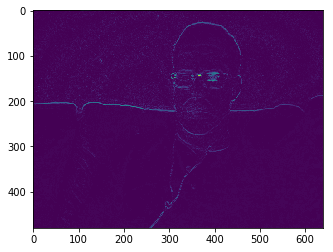

b/w png/jpg


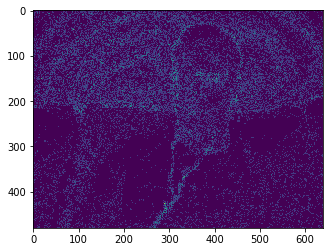

b/w png/h264


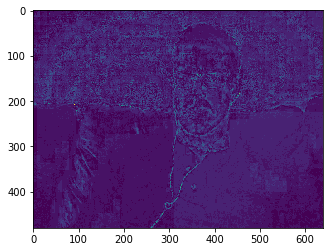

b/w jpg/h264


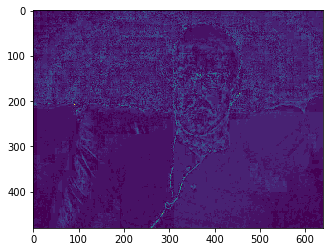

b/w orig/lossless


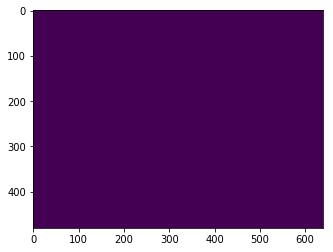

In [10]:
def diffViz(img_a, img_b, b_gray=True):
    ''' returns number of different pixels img_a vs img_b
                in grayscale if b_gray=True
    '''
    if b_gray:
        _a = cv2.cvtColor(img_a, cv2.COLOR_BGR2GRAY)
        _b = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)    
        frame_diff = cv2.absdiff(_a, _b)
        
    else:
        frame_diff = cv2.absdiff(img_a, img_b)
    
    plt.imshow(frame_diff)
    plt.show()
    
print 'b/w two adjacent frames'
diffViz(origImg1, origImg2)

print 'b/w png/jpg'
diffViz(pngCompImg1, jpgCompImg1)

print 'b/w png/h264' 
diffViz(pngCompImg1, vidCompImg1)

print 'b/w jpg/h264'
diffViz(jpgCompImg1, vidCompImg1)

print 'b/w orig/lossless'
diffViz(pngCompImg1, origImg1)

###### A simple example with a 50x50 image: how does disk storage differ

In [11]:
DATA = "../data/books/compare-compression-frames/"
fn = DATA + "rect11.jpg"
img = cv2.imread(fn)

print 'image shape:      %s' % str(img.shape)
print 'product of dims:  %i '% reduce( lambda x,y: x*y ,img.shape)
print 'memory size:      %i' % sys.getsizeof(img)
print 'file size:        %i' % os.path.getsize(fn)


image shape:      (50, 50, 3)
product of dims:  7500 
memory size:      7564
file size:        1955


In [12]:
cv2.imwrite(DATA + "output.png", img)
cv2.imwrite(DATA + "output.jpg", img)

print 'jpg file size:   %i' % os.path.getsize(DATA + "output.jpg")
print 'png file size:   %i' % os.path.getsize(DATA + "output.png")

jpg file size:   1943
png file size:   5023
